![Python_logo](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)


   # **Cortex Game: Round1--Amount**

> Before playing the game, you need to connect to SASPy first.
>
>> If it is your first time, please follow the 4 steps mentioned below!

***
## **Connect to SASPy**

**0- Connect to your Google Drive folder**

In [ ]:
my_folder = "/content/drive/MyDrive/CortexSAS"

from google.colab import drive
drive.mount('/content/drive')

# Change the following code to set your Drive folder
import os
os.chdir(my_folder)
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/CortexSAS


**1- Make sure that your Python version is 3.3 or higher as well as your Java version is 1.8.0_162 or higher**

In [ ]:
!echo "Python is at" $(which python)
!python --version

Python is at /usr/local/bin/python
Python 3.8.15


In [ ]:
!echo "Java is at" $(which java)
!/usr/bin/java -version

Java is at /usr/bin/java
openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


**2- Install SASPy**

In [ ]:
!pip install saspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**3- Create the configuration file "sascfg_personal.py"**
Please, check that your Home Region is correct, you can check it at [ODA-SAS](https://welcome.oda.sas.com/home)

In [ ]:
%%writefile sascfg_personal.py
SAS_config_names=['oda']
oda = {'java' : '/usr/bin/java',
#US Home Region 1
'iomhost' : ['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'],
#US Home Region 2
#'iomhost' : ['odaws01-usw2-2.oda.sas.com','odaws02-usw2-2.oda.sas.com'],
#European Home Region 1
#'iomhost' : ['odaws01-euw1.oda.sas.com','odaws02-euw1.oda.sas.com'],
#Asia Pacific Home Region 1
#'iomhost' : ['odaws01-apse1.oda.sas.com','odaws02-apse1.oda.sas.com'],
#Asia Pacific Home Region 2
#'iomhost' : ['odaws01-apse1-2.oda.sas.com','odaws02-apse1-2.oda.sas.com'],
'iomport' : 8591,
'authkey' : 'oda',
'encoding' : 'utf-8'
}

Overwriting sascfg_personal.py


**4- Create your .authinfo**

If there is no .authinfo file, you can create this

In [ ]:
#%%writefile .authinfo
#oda user a01658002@tec.mx password PASSWORD

Copy this file to home

In [ ]:
!cp .authinfo ~/.authinfo

**5- Establish Connection (Need to do this step each time you use SASPy)**

In [ ]:
import saspy
sas_session = saspy.SASsession(cfgfile="/content/drive/MyDrive/CortexSAS/sascfg_personal.py")
sas_session

Using SAS Config named: oda
SAS Connection established. Subprocess id is 2546



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = /content/drive/MyDrive/CortexSAS/sascfg_personal.py
WORK Path             = /saswork/SAS_work615E00006C70_odaws01-usw2.oda.sas.com/SAS_work9DB500006C70_odaws01-usw2.oda.sas.com/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 4.4.1
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 27760


***
## Connect to Cortex Data Sets

Load Cortex datasets from SAS Studio

In [ ]:
ps = sas_session.submit("""
    libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
    """)
print(ps["LOG"])


5                                                          The SAS System                      Friday, December  2, 2022 12:02:00 PM

24         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
24       ! ods graphics on / outputfmt=png;
25         
26         
27             libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
28         
29         
30         
31         ods html5 (id=saspy_internal) close;ods listing;
32         

6                                                          The SAS System                      Friday, December  2, 2022 12:02:00 PM

33         


For local Jupyter

In [ ]:
#%%SAS sas_session
#libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';

## Transform cloud SAS dataset to Python dataframe (pandas)


> **For reference**:

> 1. [Pandas library](https://pandas.pydata.org/docs/user_guide/index.html)

> 2. [sklearn.model_selection for data partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


In [ ]:
import pandas as pd

data1 = sas_session.sasdata2dataframe(
table='hist',
libref='cortex'
)

data2 = sas_session.sasdata2dataframe(
table='target_rd1',
libref='cortex'
)

## Merge the Data

In [ ]:
data_merge = pd.merge(data1, data2, on=["ID"],how="right")
data_merge.sample(5)

#data_merge.head()


,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
588648,2588649.0,SERRE,WALTER,0.0,21.0,4900.0,High School,City,8.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
619634,2619635.0,CHICAS,JAMES,0.0,26.0,242600.0,High School,Rural,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,50.0,0.0,0.0
655728,2655729.0,HESLER,FRANCES,1.0,32.0,83500.0,High School,Downtown,9.0,0.0,...,2.0,2.0,6.0,760.0,10.0,750.0,0.0,0.0,0.0,0.0
670843,2670844.0,TIGHE,NELSON,0.0,33.0,53700.0,University / College,City,7.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
299865,2299866.0,TARANTINO,MARTIN,0.0,70.0,26200.0,University / College,Downtown,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [ ]:
data_merge.columns

Index(['ID', 'LastName', 'FirstName', 'Woman', 'Age', 'Salary', 'Education',
       'City', 'SeniorList', 'NbActivities', 'Referrals', 'Recency',
       'Frequency', 'Seniority', 'TotalGift', 'MinGift', 'MaxGift',
       'GaveLastYear', 'AmtLastYear', 'GaveThisYear', 'AmtThisYear'],
      dtype='object')

# Felipe

Poner mas alto  - Recency, Seniority


1. Rellenar todos los nan (NO)
	Se puede predecir algunos nan con modelo NO
2. TODO dataset predecir anterior año, target AmtLastYear -> AmtGiven
3. Actualizar COPIA TODO dataset con anterior año GaveLastYear = 1, target AmtThisYear -> AmtGiven
4. Juntar TODO y COPIA TODO ACTUALIZADA predecir AmtGiven



Se puede crear un meanGift
Se puede crear un GaveLastYear para todo dataset original con Recency = 1

SeniorList sirve
Referrals sirve

Se puede hacer drop de Recency despu[es de procesar cuando = 1 y sacar media?
Se puede dropear frequency ya que puede ser usado para probabilidad de donacion, no cantidad
""" seniority lo mismo

## Data Exploration

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = data_merge.copy()
df.describe()

,ID,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,336334.000000,336334.000000,336334.000000,336334.000000,336334.000000,336334.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2.500000e+06,0.516936,46.366170,65531.654000,4.582967,0.561413,0.560556,3.039636,1.666882,4.474148,104.454055,43.130251,85.897932,0.122101,7.673015,0.122232,7.741080
std,2.886753e+05,0.499713,18.945324,61051.122343,3.325844,0.996803,1.054027,2.120722,1.052090,2.588119,303.760477,150.249476,283.581066,0.327403,82.224854,0.327554,83.110552
min,2.000001e+06,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,2.250001e+06,0.000000,30.000000,20700.000000,2.000000,0.000000,0.000000,1.000000,1.000000,2.000000,20.000000,15.000000,20.000000,0.000000,0.000000,0.000000,0.000000
50%,2.500000e+06,1.000000,46.000000,44000.000000,4.000000,0.000000,0.000000,2.000000,1.000000,4.000000,40.000000,20.000000,30.000000,0.000000,0.000000,0.000000,0.000000
75%,2.750000e+06,1.000000,61.000000,91200.000000,7.000000,1.000000,1.000000,4.000000,2.000000,6.000000,90.000000,30.000000,75.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000e+06,1.000000,90.000000,250000.000000,10.000000,10.000000,16.000000,10.000000,10.000000,10.000000,15150.000000,10000.000000,10000.000000,1.000000,10000.000000,1.000000,10000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   ID            1000000 non-null  float64
 1   LastName      999977 non-null   object 
 2   FirstName     999996 non-null   object 
 3   Woman         1000000 non-null  float64
 4   Age           1000000 non-null  float64
 5   Salary        1000000 non-null  float64
 6   Education     1000000 non-null  object 
 7   City          1000000 non-null  object 
 8   SeniorList    1000000 non-null  float64
 9   NbActivities  1000000 non-null  float64
 10  Referrals     1000000 non-null  float64
 11  Recency       336334 non-null   float64
 12  Frequency     336334 non-null   float64
 13  Seniority     336334 non-null   float64
 14  TotalGift     336334 non-null   float64
 15  MinGift       336334 non-null   float64
 16  MaxGift       336334 non-null   float64
 17  GaveLastYear  1000000 non-nu

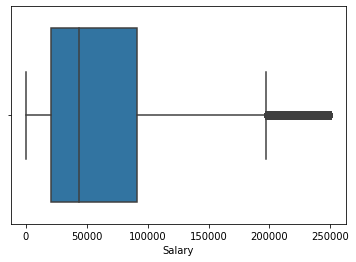

In [ ]:
sns.boxplot(data=df, x="Salary")

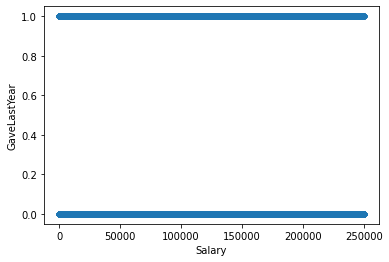

In [ ]:
df.plot('Salary', 'GaveLastYear', kind = 'scatter')

In [ ]:
# pd.plotting.scatter_matrix(df)

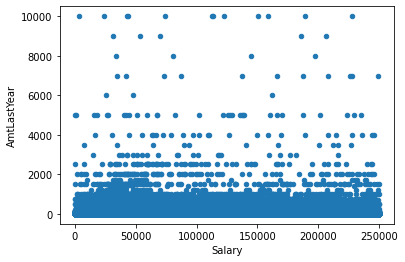

In [ ]:
df.plot('Salary', 'AmtLastYear', kind = 'scatter')

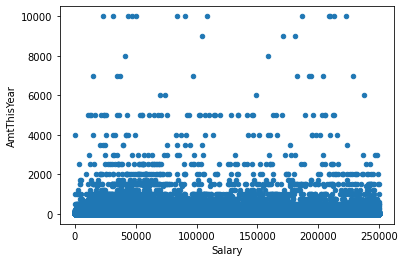

In [ ]:
df.plot('Salary', 'AmtThisYear', kind = 'scatter')

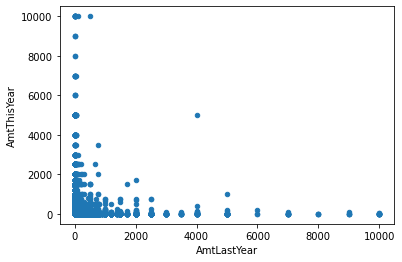

In [ ]:
df.plot('AmtLastYear', 'AmtThisYear', kind = 'scatter')

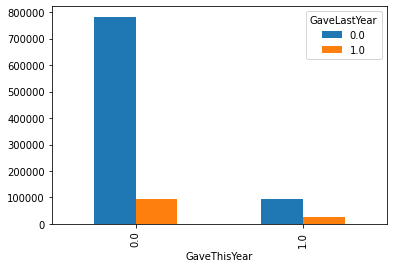

In [ ]:
pd.crosstab(df['GaveThisYear'], df['GaveLastYear']).plot.bar()

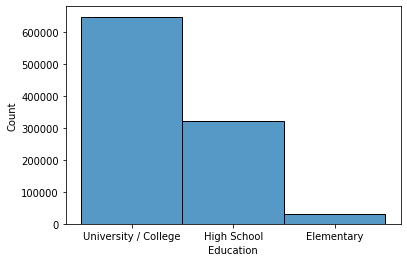

In [ ]:
sns.histplot(data=df, x='Education')

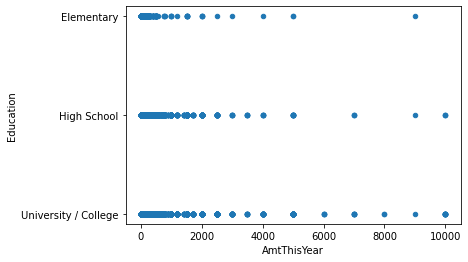

In [ ]:
df.plot('AmtThisYear', 'Education', kind = 'scatter')

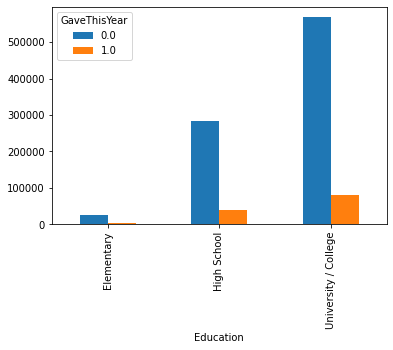

In [ ]:
pd.crosstab(df['Education'], df['GaveThisYear']).plot.bar()

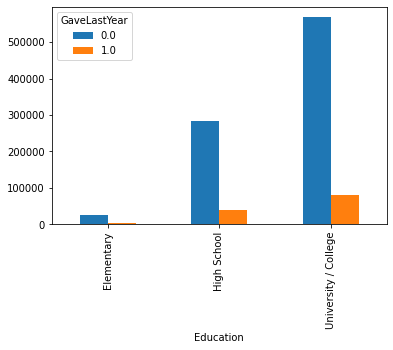

In [ ]:
pd.crosstab(df['Education'], df['GaveLastYear']).plot.bar()

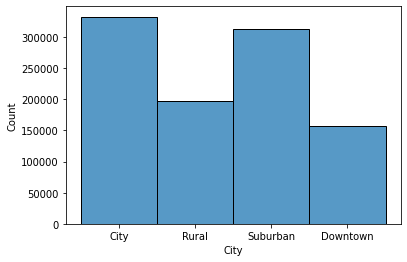

In [ ]:
sns.histplot(data=df, x='City')

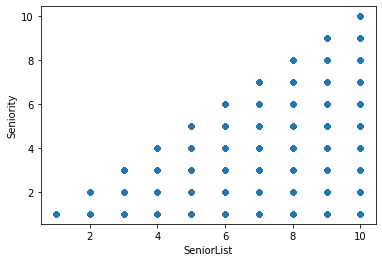

In [ ]:
df.plot('SeniorList', 'Seniority', kind = 'scatter') # Años desde primera donación

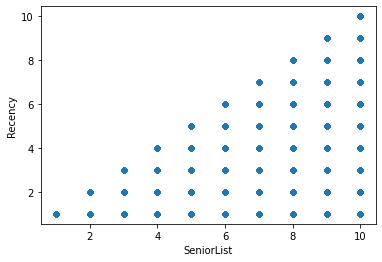

In [ ]:
df.plot('SeniorList', 'Recency', kind = 'scatter') # Años desde última donación

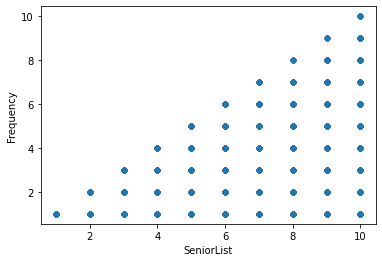

In [ ]:
df.plot('SeniorList', 'Frequency', kind = 'scatter') # Numero de donaciones

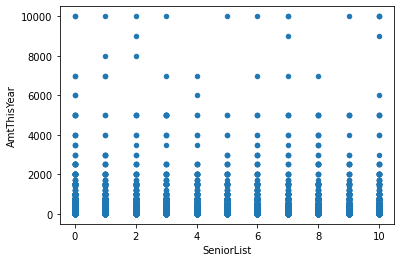

In [ ]:
df.plot('SeniorList', 'AmtThisYear', kind = 'scatter') # Numero de donaciones

In [ ]:
df[df['SeniorList'] == 0].sample(20)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
968845,2968846.0,ORTEGA,SAMANTHA,1.0,44.0,23000.0,Elementary,Suburban,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
411634,2411635.0,HAMMOND,CURTIS,0.0,16.0,25600.0,High School,Suburban,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
854276,2854277.0,CLAUSEN,CHERYL,1.0,30.0,12100.0,High School,Downtown,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
392235,2392236.0,GIBBS,GEORGE,0.0,34.0,234500.0,University / College,City,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
145592,2145593.0,BAILEY,ROBERT,0.0,58.0,12800.0,University / College,Suburban,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
399718,2399719.0,MARINO,RICHARD,0.0,67.0,23500.0,University / College,City,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
807676,2807677.0,JOHNSON,CATHRYN,1.0,16.0,26300.0,University / College,City,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
496544,2496545.0,OSTERBERG,ANGELA,1.0,62.0,43000.0,University / College,City,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
165608,2165609.0,GAUTHIER,LILLIAN,1.0,62.0,30400.0,High School,Downtown,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
997261,2997262.0,SHAW,GERALD,0.0,24.0,5300.0,University / College,Suburban,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [ ]:
df[df['SeniorList'] == 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166199 entries, 6 to 999998
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            166199 non-null  float64
 1   LastName      166197 non-null  object 
 2   FirstName     166199 non-null  object 
 3   Woman         166199 non-null  float64
 4   Age           166199 non-null  float64
 5   Salary        166199 non-null  float64
 6   Education     166199 non-null  object 
 7   City          166199 non-null  object 
 8   SeniorList    166199 non-null  float64
 9   NbActivities  166199 non-null  float64
 10  Referrals     166199 non-null  float64
 11  Recency       0 non-null       float64
 12  Frequency     0 non-null       float64
 13  Seniority     0 non-null       float64
 14  TotalGift     0 non-null       float64
 15  MinGift       0 non-null       float64
 16  MaxGift       0 non-null       float64
 17  GaveLastYear  166199 non-null  float64
 18  AmtL

In [ ]:
df[df['SeniorList'] > 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 833801 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            833801 non-null  float64
 1   LastName      833780 non-null  object 
 2   FirstName     833797 non-null  object 
 3   Woman         833801 non-null  float64
 4   Age           833801 non-null  float64
 5   Salary        833801 non-null  float64
 6   Education     833801 non-null  object 
 7   City          833801 non-null  object 
 8   SeniorList    833801 non-null  float64
 9   NbActivities  833801 non-null  float64
 10  Referrals     833801 non-null  float64
 11  Recency       336334 non-null  float64
 12  Frequency     336334 non-null  float64
 13  Seniority     336334 non-null  float64
 14  TotalGift     336334 non-null  float64
 15  MinGift       336334 non-null  float64
 16  MaxGift       336334 non-null  float64
 17  GaveLastYear  833801 non-null  float64
 18  AmtL

In [ ]:
df[df['MinGift'].isna()].sample(5)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
953593,2953594.0,STRACHE,JERMAINE,0.0,55.0,109400.0,University / College,City,8.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30.0,0.0,0.0
230748,2230749.0,OCHOA,FREDERICK,0.0,23.0,67900.0,University / College,City,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,20.0,0.0,0.0
576716,2576717.0,HOPKINS,KATHY,1.0,82.0,17200.0,University / College,City,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,50.0,0.0,0.0
804083,2804084.0,BARNETT,AIKO,1.0,42.0,5300.0,High School,City,4.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
55940,2055941.0,RAMKISSOON,KATIE,1.0,70.0,11200.0,University / College,City,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


## Data preprocessing

In [ ]:
def drop_cols(df):
  return df.drop(columns=['LastName', 'FirstName'])

In [ ]:
def dummies(df):
  df = pd.concat([df, pd.get_dummies(df["Education"])], axis = 1)
  df = df.drop('Education', axis = 1)

  df = pd.concat([df, pd.get_dummies(df["City"])], axis = 1)
  return df.drop('City', axis = 1)

### Llenar NA Values

In [ ]:
def fill_na(df, MAX_FILL):
  df.loc[df['Recency'].isna(), 'Recency'] = MAX_FILL
  df.loc[df['Frequency'].isna(), 'Frequency'] = 0
  df.loc[df['Seniority'].isna(), 'Seniority'] = MAX_FILL
  df.loc[df['TotalGift'].isna(), 'TotalGift'] = 0
  df.loc[df['MinGift'].isna(), 'MinGift'] = 0
  df.loc[df['MaxGift'].isna(), 'MaxGift'] = 0
  return df

In [ ]:
def rename_df(df):
  return df.rename(columns = {"AmtLastYear" : "AmtGiven", "GaveLastYear": "Gave"})

In [ ]:
def update_df2(df2, MAX_FILL):
  df2.loc[df2['Gave'] == 1, 'Recency'] = 1
  df2.loc[(df2['Gave'] == 0) & (df2['Recency'] < MAX_FILL), 'Recency'] += 1
  df2.loc[df2['Gave'] == 1, 'Frequency'] += 1
  df2.loc[(df2['Gave'] == 1) & (df2['Seniority'] == MAX_FILL), 'Seniority'] = 1
  df2.loc[df2['Seniority'] < MAX_FILL, 'Seniority'] += 1
  df2['TotalGift'] += df2['AmtGiven']
  df2.loc[df2['Gave'] == 1 & ((df2['MinGift'] > df2['AmtGiven']) | (df2['MinGift'] == 0)), 'MinGift'] = df2['AmtGiven']
  df2.loc[(df2['MaxGift'] < df2['AmtGiven']), 'MaxGift'] = df2['AmtGiven']
  df2 = df2.drop(['AmtGiven', 'Gave'], axis=1)
  return df2

In [ ]:
def rename_df2(df2):
    return df2.rename(columns = {"AmtThisYear" : "AmtGiven", "GaveThisYear": "Gave"})

In [ ]:
def drop_df(df):
  return df.drop(['AmtThisYear', 'GaveThisYear'], axis=1)

In [ ]:
def add_vars(data):
  data['JustGave'] = 0
  data.loc[data['Recency'] == 1, 'JustGave'] = 1
  data['MeanGift'] = data['TotalGift'] / data['Frequency']
  data.loc[data['MeanGift'].isna(), 'MeanGift'] = 0
  return data  

In [ ]:
def preprocess(data, train):
  df = data.copy()
  df = drop_cols(df)
  df = dummies(df)
  MAX_FILL = 100
  df = fill_na(df, MAX_FILL)
  df = rename_df(df)
  df2 = df.copy()
  df2 = update_df2(df2, MAX_FILL)

  if train == True:
    df2 = rename_df2(df2)
    df = drop_df(df)
    double_data = df.append(df2)
    double_data = add_vars(double_data)
    return double_data
  else:
    df2 = add_vars(df2)
    return df2

In [ ]:
double_data = preprocess(data_merge, train = True)
double_data.to_csv('PreprocessedDouble.csv', index=False)

In [ ]:
# data_merge = drop_cols(data_merge)
# data_merge.dropna(inplace =True)
# data_merge.info()
# data_merge.to_csv('DataMergeOriginalNotNull.csv', index=False)
# data_merge.sort_values(["Recency"], axis = 0, ascending = True,
#                  inplace = True, na_position ='last')
# data_merge.head(50)

Text(0.5, 1.0, 'Correlation matrix for the Cortex Fundraising dataset')

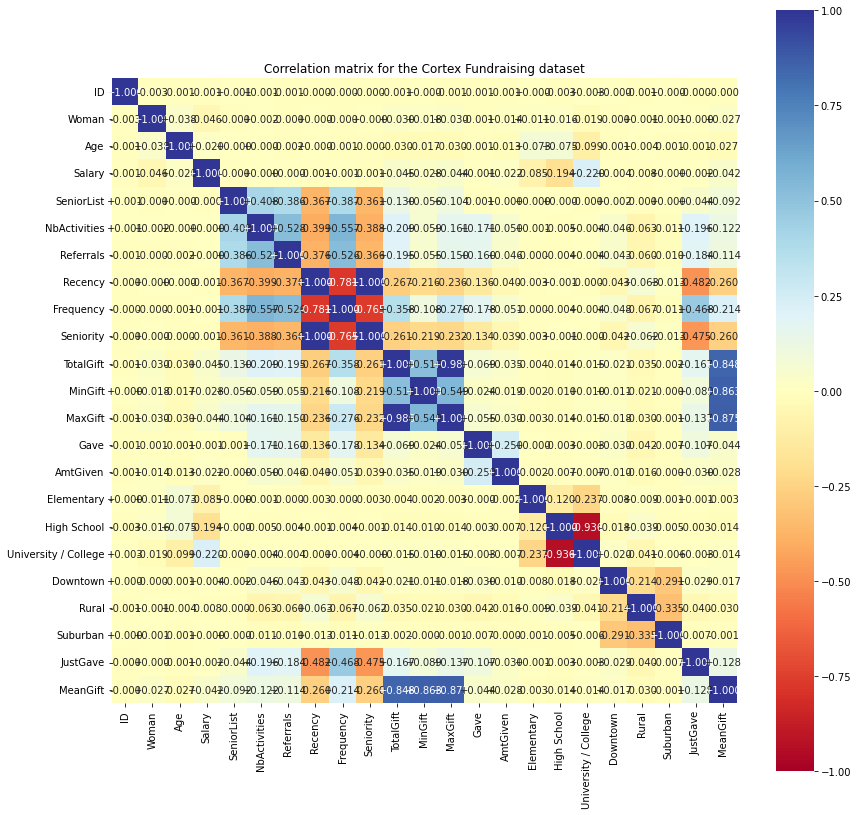

In [ ]:
plt.figure(figsize=(14,14))
sns.heatmap(double_data.corr(), cmap="RdYlBu", 
    annot=True, square=True,
    vmin=-1, vmax=1, fmt="+.3f")
plt.title("Correlation matrix for the Cortex Fundraising dataset")

# Models Felipe

## Treat Missing Values

> Please be aware that deleting all missing values can induce a selection bias. 
Some missing values are very informative. For example, when MinGift is missing, it means that the donor never gave in the past 10 years (leading to but excluding last year). Instead of deleting this information, replacing it by 0 is more appropriate!

> A good understanding of the business case and the data can help you come up with more appropriate strategies to deal with missing values.


## Data Partition

In [ ]:
# # Only donors
double_data = double_data[double_data['Gave'] == 1]
double_data.to_csv('PreprocessedDoubleGave.csv', index=False)

In [ ]:
# All data doubled
# double_data = pd.read_csv('PreprocessedDouble.csv')
double_data = pd.read_csv('PreprocessedDoubleGave.csv')
from sklearn.model_selection import train_test_split
train, validation = train_test_split(double_data, test_size=0.1, random_state=12345)

## Prebuilt Models to Predict donation amount
***

### **Linear Regression Model**


> The [sk-learn library](https://scikit-learn.org/stable/index.html ) offers more advanced models.


In [ ]:
double_data.columns

Index(['ID', 'Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities',
       'Referrals', 'Recency', 'Frequency', 'Seniority', 'TotalGift',
       'MinGift', 'MaxGift', 'Gave', 'AmtGiven', 'Elementary', 'High School',
       'University / College', 'Downtown', 'Rural', 'Suburban', 'JustGave',
       'MeanGift'],
      dtype='object')

In [ ]:
from sklearn import linear_model, preprocessing
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.neural_network import MLPRegressor
# from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostRegressor
import numpy as np
from sklearn import metrics
import xgboost as xgb


# predictors = ['Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities',
#        'Referrals', 'Recency', 'Frequency', 'Seniority', 'TotalGift',
#        'MinGift', 'MaxGift', 'Elementary', 'High School',
#        'University / College', 'Downtown', 'Rural', 'Suburban', 'JustGave',
#        'MeanGift']

# predictors = ['Age', 'Referrals', 'SeniorList','MinGift', 'Woman', 'NbActivities', 'JustGave', 'Frequency']

# Predictors only Gave = 1
predictors = ['Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities',
       'Referrals', 'Recency', 'Frequency', 'Seniority', 'TotalGift',
       'MinGift', 'MaxGift', 'Rural', 'JustGave', 'MeanGift']

X_train = train[predictors] 
Y_train = train['AmtGiven']
X_valid = validation[predictors] 
Y_valid = validation['AmtGiven']

# Sacler
# scaler = preprocessing.StandardScaler().fit(X_train)
# X_train = pd.DataFrame(scaler.transform(X_train))
# X_valid = pd.DataFrame(scaler.transform(X_valid))

# Models tried
# regr = linear_model.LinearRegression()
regr = DecisionTreeRegressor(max_depth=7)
# regr = MLPRegressor(random_state=1, max_iter=500, early_stopping=True)
# regr = linear_model.BayesianRidge()
# regr = MultinomialNB() # Malo
# regr = RandomForestClassifier(n_estimators=30, max_depth=None, min_samples_split=2, random_state=0, max_features=None)
# regr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=2)
# regr = xgb.XGBRegressor(objective="reg:linear", random_state=42)

regr.fit(X_train,Y_train)
regr_predict=regr.predict(X_valid)

In [ ]:
validation["Pred"] = regr_predict
validation[["AmtGiven", "Pred"]].sample(10)
# great = validation.loc[validation["AmtGiven"] > 400]
# great[["AmtGiven", "Pred"]].head(10)

,AmtGiven,Pred
114733,30.0,53.127382
38098,10.0,62.185843
225433,25.0,62.678150
1715,20.0,37.775828
142192,40.0,121.176658
217366,25.0,44.358454
156853,20.0,62.185843
84108,25.0,47.963204
226317,30.0,47.963204
49678,50.0,48.135236


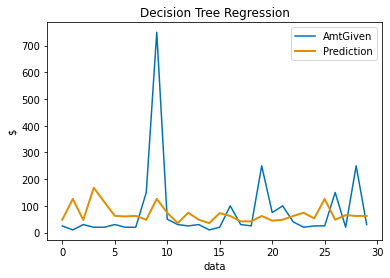

In [ ]:
colors = sns.color_palette("colorblind")
X = np.arange(30)

plt.figure()
plt.plot(X, Y_valid[:30], color=colors[0], label="AmtGiven")
plt.plot(X, regr_predict[:30], color=colors[1], label="Prediction", linewidth=2)
plt.xlabel("data")
plt.ylabel("$")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [ ]:
#MAE
print(metrics.mean_absolute_error(Y_valid,regr_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,regr_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,regr_predict)))

61.153547656056006
42162.036696581345
205.33396381646497


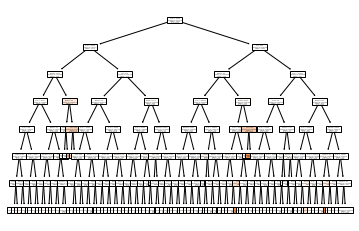

In [ ]:
plot_tree(regr, filled = True, feature_names=predictors)
plt.show()

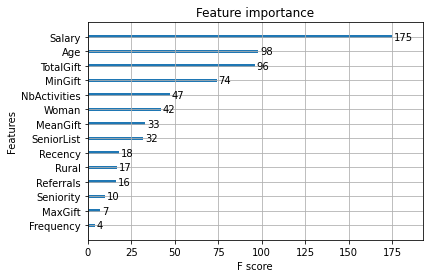

In [ ]:
# xgb.plot_importance(regr)

## **Probability of Giving**

### **Decision Tree**

In [ ]:
double_data = pd.read_csv('PreprocessedContact.csv')

gave = double_data[double_data['Gave'] == 1]
n = gave['ID'].count()
didnt_give = double_data[double_data['Gave'] == 0].sample(n)
double_data = gave.append(didnt_give)

train, validation = train_test_split(double_data, test_size=0.1, random_state=12345)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

predictors2 = ['Age','JustGave','Contact','Woman', 'NbActivities',
              'TotalGift', 'Frequency', 'Recency', 'Referrals']

X_train = train[predictors2] 
Y_train = train['Gave']
X_valid = validation[predictors2] 
Y_valid = validation['Gave']

DT_model_prob = DecisionTreeClassifier(max_depth=4,criterion="entropy")
DT_model_prob.fit(X_train,Y_train)
DT_predict_proba = DT_model_prob.predict_proba(X_valid) #Predictions on Testing data
DT_predict_prob = DT_model_prob.predict(X_valid) #Predictions on Testing data
DT_probs = DT_model_prob.predict_proba(X_valid)[:, 1]
print(DT_probs)

[0.31971499 0.31971499 0.31971499 ... 0.75558836 0.31971499 0.75006851]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_valid, DT_predict_prob))

              precision    recall  f1-score   support

         0.0       0.63      0.73      0.68     14978
         1.0       0.68      0.58      0.62     14914

    accuracy                           0.65     29892
   macro avg       0.66      0.65      0.65     29892
weighted avg       0.65      0.65      0.65     29892



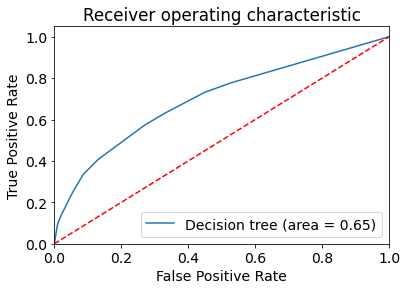

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

DT_roc_auc = roc_auc_score(Y_valid, DT_model_prob.predict(X_valid))
fpr, tpr, thresholds = roc_curve(Y_valid, DT_model_prob.predict_proba(X_valid)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision tree (area = %0.2f)' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

### **Tensorflow**

In [ ]:
double_data = pd.read_csv('PreprocessedDouble.csv')
gave = double_data[double_data['Gave'] == 1]
n = gave['ID'].count()
didnt_give = double_data[double_data['Gave'] == 0].sample(n)
double_data = gave.append(didnt_give)

train, validation = train_test_split(double_data, test_size=0.1, random_state=12345)

In [ ]:
import tensorflow as tf
from keras.layers import Dense, Dropout
from keras import optimizers

In [ ]:
# predictors = ['Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities',
#        'Referrals', 'Recency', 'Frequency', 'Seniority', 'TotalGift',
#        'MinGift', 'MaxGift', 'Rural', 'JustGave', 'MeanGift']

# Predictors Gave
predictorsTF = ['SeniorList', 'NbActivities', 'Referrals', 'Recency', 'Frequency', 'Seniority', 'TotalGift',
       'MinGift', 'High School', 'Downtown', 'Rural', 'Suburban', 'JustGave', 'MeanGift']

X_train = train[predictors] 
Y_train = train['Gave']
X_valid = validation[predictors] 
Y_valid = validation['Gave']

input_dim = X_train.shape[1]
input_dim

In [ ]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(input_dim,)),
    Dense(units=30, activation="relu", kernel_initializer=tf.keras.initializers.HeUniform()),
    Dense(units=1, activation="sigmoid")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                450       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(label_smoothing=0.1), optimizer=optimizers.Adam(), metrics=[tf.keras.metrics.BinaryAccuracy() ,tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

In [ ]:
history = model.fit(X_train, Y_train, epochs=6, validation_data=(X_valid, Y_valid))

Epoch 1/6
13744/13744 [==============================] - 29s 2ms/step - loss: 0.7907 - binary_accuracy: 0.5941 - recall: 0.5517 - precision: 0.6025 - val_loss: 0.6716 - val_binary_accuracy: 0.6216 - val_recall: 0.5447 - val_precision: 0.6461
Epoch 2/6
13744/13744 [==============================] - 28s 2ms/step - loss: 0.7513 - binary_accuracy: 0.6002 - recall: 0.5643 - precision: 0.6078 - val_loss: 0.7008 - val_binary_accuracy: 0.6057 - val_recall: 0.6041 - val_precision: 0.6081
Epoch 3/6
13744/13744 [==============================] - 28s 2ms/step - loss: 0.7240 - binary_accuracy: 0.6055 - recall: 0.5675 - precision: 0.6139 - val_loss: 0.6762 - val_binary_accuracy: 0.6092 - val_recall: 0.7779 - val_precision: 0.5831
Epoch 4/6
13744/13744 [==============================] - 36s 3ms/step - loss: 0.6976 - binary_accuracy: 0.6118 - recall: 0.5646 - precision: 0.6232 - val_loss: 0.6718 - val_binary_accuracy: 0.6195 - val_recall: 0.4674 - val_precision: 0.6749
Epoch 5/6
13744/13744 [=========

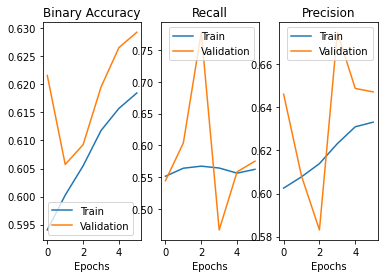

In [ ]:
plt.subplot(1, 3, 1)
plt.title("Binary Accuracy")
plt.xlabel("Epochs")
plt.plot(history.history["binary_accuracy"], label="Train")
plt.plot(history.history["val_binary_accuracy"], label="Validation")
plt.legend()

plt.subplot(1, 3, 2)
plt.title("Recall")
plt.xlabel("Epochs")
plt.plot(history.history["recall"], label="Train")
plt.plot(history.history["val_recall"], label="Validation")
plt.legend()

plt.subplot(1, 3, 3)
plt.title("Precision")
plt.xlabel("Epochs")
plt.plot(history.history["precision"], label="Train")
plt.plot(history.history["val_precision"], label="Validation")
plt.legend()

In [ ]:
y_pred_nn = model.predict(X_valid)
validation["Prob"] = y_pred_nn
validation[["Gave", "Prob"]].sample(30)

,Gave,Prob
1015809,1.0,0.701958
1284175,1.0,0.737804
1805945,1.0,0.704514
1059759,1.0,0.448345
482559,1.0,0.444629
1188,1.0,0.519968
1101466,1.0,0.599278
1516452,0.0,0.398025
824639,1.0,0.295651
363105,1.0,0.434841


# Scoring New Data

## Prepare data for scoring

In [ ]:
data3 = sas_session.sasdata2dataframe(
table='score_rd1',
libref='cortex'
)
data4 = sas_session.sasdata2dataframe(
table='score',
libref='cortex'
)

 ### Score new data based on your champion model
 
> Pick your champion model from previous steps and use it to predict next year donations. 
 
> In this case, the linear regression model performed better than the regression tree based on the MSE criterion.

In [ ]:
scoring_data = pd.merge(data3, data4, on=["ID"],how="right")
scoring_data = preprocess(scoring_data, train = False)

Predict Amount with tree

In [ ]:
X = scoring_data[predictors] 
regr_predict_end=regr.predict(X)

scoring_data['Prediction'] = regr_predict_end
scoring_data.sort_values(by=['Prediction'], inplace=True,ascending=False)

Predict with Neural Network

In [ ]:
Xtf = scoring_data[predictorsTF] 
y_pred_nn = model.predict(Xtf)
scoring_data['Probability'] = y_pred_nn

31250/31250 [==============================] - 37s 1ms/step


In [ ]:
scoring_data.head(5)

,ID,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,...,Elementary,High School,University / College,Downtown,Rural,Suburban,JustGave,MeanGift,Prediction,Probability
527000,2527001.0,0.0,54.0,148400.0,10.0,4.0,2.0,2.0,3.0,6.0,...,0,0,1,1,0,0,0,16.666667,10000.0,0.671888
9566,2009567.0,1.0,54.0,244700.0,10.0,3.0,2.0,1.0,3.0,4.0,...,0,0,1,0,0,1,1,16.666667,10000.0,0.656000
420890,2420891.0,1.0,37.0,104200.0,10.0,5.0,5.0,1.0,2.0,8.0,...,1,0,0,1,0,0,1,8000.000000,9000.0,1.000000
286775,2286776.0,1.0,23.0,249000.0,6.0,5.0,3.0,1.0,1.0,1.0,...,0,0,1,0,0,1,1,7000.000000,9000.0,1.000000
184873,2184874.0,1.0,37.0,144900.0,9.0,0.0,1.0,2.0,1.0,2.0,...,0,0,1,0,0,1,0,25.000000,8000.0,0.371514


In [ ]:
Result = scoring_data.loc[scoring_data['Probability'] > 0.4, 'ID']

Result= Result.astype(int)

In [ ]:
len(Result)

752164

In [ ]:
print(Result)

527000    2527001
9566      2009567
420890    2420891
286775    2286776
982303    2982304
           ...   
240226    2240227
691173    2691174
292451    2292452
41679     2041680
588352    2588353
Name: ID, Length: 752164, dtype: int64


## Exporting Results to a CSV File

In [ ]:
Result= scoring_data[['ID','Prediction']]
Result[Result['Prediction'] > 75].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156328 entries, 9566 to 58785
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          156328 non-null  float64
 1   Prediction  156328 non-null  float64
dtypes: float64(2)
memory usage: 3.6 MB


In [ ]:
Result= scoring_data['ID'].astype(int)

In [ ]:
# Define your cutoff and choose a number of rows to submit to the leaderboard
NB = 155000
submission = Result.head(NB)
submission.to_csv('Tree7DoubleOnlyDonors155.csv', index=False)

# Scoring Data With Contact

In [ ]:
data3 = sas_session.sasdata2dataframe(
table='score',
libref='cortex'
)
data4 = sas_session.sasdata2dataframe(
table='score_rd2_contact',
libref='cortex'
)
data5 = sas_session.sasdata2dataframe(
table='score_rd2_nocontact',
libref='cortex'
)

### Predict 'amount' | Prob for members who were contacted

In [ ]:
scoring_data_contact = pd.merge(data3, data4, on=["ID"],how="right")
scoring_data_contact = preprocess(scoring_data_contact, train = False)
X_amt = scoring_data_contact[predictors]
X_prob = scoring_data_contact[predictors2] 


regr_predict_amt=regr.predict(X_amt)
scoring_data_contact['Amt'] = regr_predict_amt

regr_predict_prob=DT_model_prob.predict_proba(X_prob)[:,1]
scoring_data_contact['ProbContact'] = regr_predict_prob
scoring_data_contact= scoring_data_contact[['ID','Amt', 'ProbContact']]

In [ ]:
scoring_data_contact.sample(5)

,ID,Amt,ProbContact
481499,2481500.0,48.206071,0.751117
7770,2007771.0,52.312829,0.537045
117414,2117415.0,47.963204,0.878486
535241,2535242.0,126.071248,0.903185
833511,2833512.0,44.358454,0.750069


### Predict 'prob given' for members who were not contacted

In [ ]:
scoring_data_nocontact = pd.merge(data3, data5, on=["ID"],how="right")
scoring_data_nocontact = preprocess(scoring_data_nocontact, train = False)

X_prob = scoring_data_nocontact[predictors2] 

regr_predict_nocontact=DT_model_prob.predict_proba(X_prob)[:,1]

scoring_data_nocontact['ProbNoContact'] = regr_predict_nocontact

scoring_data_nocontact= scoring_data_nocontact[['ID','ProbNoContact']]

In [ ]:
scoring_data_nocontact.sample(5)

,ID,ProbNoContact
268319,2268320.0,0.319715
541220,2541221.0,0.550744
284169,2284170.0,0.319715
604112,2604113.0,0.550744
781009,2781010.0,0.319715


In [ ]:
result_Amt = pd.merge(scoring_data_contact, scoring_data_nocontact, on=["ID"],how="right")
result_Amt.head(3)

,ID,Amt,ProbContact,ProbNoContact
0,2000001.0,72.852538,0.751117,0.550744
1,2000002.0,41.843750,0.903185,0.492087
2,2000003.0,94.275650,0.903185,0.319715


In [ ]:
# def Calc_Uplift(raw_data):
#     return ((raw_data['Amt']*raw_data['ProbContact']*1.25) - (raw_data['Amt']*raw_data['ProbNoContact']))

# result_Amt["Uplift"] = result_Amt.apply(lambda row: Calc_Uplift(row), axis=1)

# # Sorting data by descending Uplift value
# result_Amt.sort_values(by=['ProbContact', 'Uplift'], ascending=False, inplace=True)

In [ ]:
# result_Amt[result_Amt['Uplift'] > 50].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142464 entries, 755699 to 127186
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             142464 non-null  float64
 1   Amt            142464 non-null  float64
 2   ProbContact    142464 non-null  float64
 3   ProbNoContact  142464 non-null  float64
 4   Uplift         142464 non-null  float64
dtypes: float64(5)
memory usage: 6.5 MB


In [ ]:
result_Amt[result_Amt['ProbContact'] > 0.90].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202841 entries, 755699 to 292451
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             202841 non-null  float64
 1   Amt            202841 non-null  float64
 2   ProbContact    202841 non-null  float64
 3   ProbNoContact  202841 non-null  float64
 4   Uplift         202841 non-null  float64
dtypes: float64(5)
memory usage: 9.3 MB


In [ ]:
result_Amt.sample(3)

,ID,Amt,ProbContact,ProbNoContact,Uplift
2685,2002686.0,35.425798,0.751117,0.319715,21.935006
163392,2163393.0,41.997483,0.875000,0.550744,22.804902
150273,2150274.0,48.206071,0.878486,0.550744,26.386266


In [ ]:
# Result = result_Amt[(result_Amt['Uplift'] > 50) | ((result_Amt['Amt'] > 100) & (result_Amt['ProbContact'] > 0.85))]
# Result= Result['ID'].astype(int)

In [ ]:
len(Result)

143806

In [ ]:
result_Amt.sort_values(by=['ProbContact', 'Amt'], ascending=False, inplace=True)
Result= result_Amt['ID'].astype(int)

In [ ]:
NB = 160000
submission = Result.head(NB)
submission.to_csv('Tree7OnlyDonorsTree4ProbContAmt160.csv', index=False)